# Import the Library

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for statistical data visualization
import matplotlib.pyplot as plt # for data visualization purposes
import numpy as np # linear algebra
import os

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

In [2]:
%matplotlib inline 
# sets the backend of matplotlib to the 'inline' backend
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

# Loading and Preprocessing the Data

Load the data from the csv file and examine it.

In [3]:
data = pd.read_csv("data\gender_classification_v7.csv")

In [4]:
pd.DataFrame(data)
data.head()
#data.iloc[:,[7]].head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
# check data type of all columns
data.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [6]:
# count number of each value of the target variable
data.gender.value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [7]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
# check null values in the dataset
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

### No null value in the dataset.

In [9]:
X = data
X = X.drop(['gender'], axis=1)

In [10]:
y = data['gender']

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(RandomForestClassifier(random_state = 42), step = 1, cv = 10, scoring = 'accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 7
Selected features: ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']


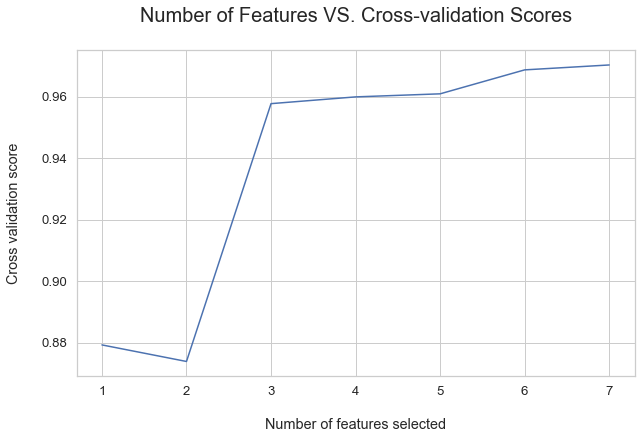

In [12]:
# Plot number of features VS. cross-validation scores
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Number of Features VS. Cross-validation Scores\n', fontsize = 20)
plt.xlabel("Number of features selected", labelpad = 20)
plt.ylabel("Cross validation score", labelpad = 20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

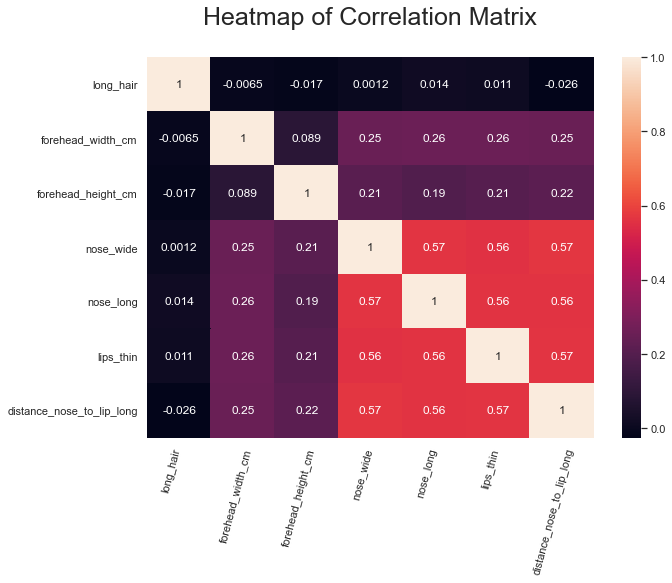

In [13]:
# show result of correlation of the features variable
corrMatrix = X.corr()

# display using table
#corr_table = pd.DataFrame(corrMatrix, index=['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 
#                                             'nose_long', 'lips_thin', 'distance_nose_to_lip_long'])
#corr_table

# display using heatmap
sns.set(font_scale=1)
plt.subplots(figsize=(10,7))
plt.title('Heatmap of Correlation Matrix\n', fontsize = 25)
corr = sns.heatmap(corrMatrix, annot=True)
plt.xticks(np.arange(7) + 0.38, corr.get_xticklabels(), rotation = 75)
plt.show()

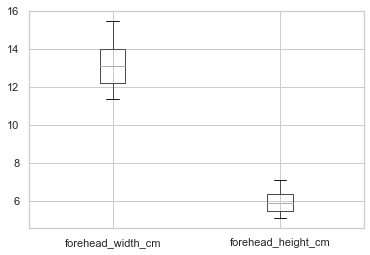

In [14]:
sns.set_style("whitegrid")
ax = data.boxplot(column=['forehead_width_cm', 'forehead_height_cm'])

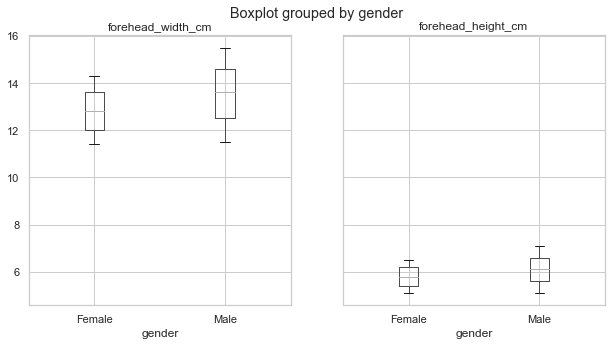

In [15]:
ax_by_gender = data.boxplot(column = ['forehead_width_cm', 'forehead_height_cm'], by="gender", figsize=(10,5))

### No outlier detected.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data.head()
#data.iloc[:,[7]].head()

# Assuming male = 1, female = 0

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


# Data Spliting

Split the data into train and test data.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
X_train.shape[0]

4000

In [19]:
X_test.shape[0]

1001

<hr style="border:0.3px solid gray"> </hr>

# KNN Algorithm

Fit the data into K Nearest Neighbors algorithm. KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.

## Feature Scaling

Using either MinMaxScaler or StandardScaler to scale the data, choose the one with higher performance score.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [21]:
before_tune = []

## First Hypotesis: Before Tuning

In [22]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

knn = KNeighborsClassifier(weights = 'distance')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_accu = knn.score(X_test, y_test)
print("Model accuracy score        :", knn_accu)

Model accuracy score        : 0.965034965034965


In [23]:
# Normalize the data

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

knn = KNeighborsClassifier(weights = 'distance')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_accu = knn.score(X_test, y_test)
print("Model accuracy score        :", knn_accu)
before_tune.append(knn_accu)

Model accuracy score        : 0.964035964035964


### Standardization give the better accuracy.

## Second Hypotesis: After Tuning

Finding the optimal value of K without overfitting.

Reference: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

In [24]:
# Standardize the data

standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

k_value = [i for i in range(1, 200)]
error_rate = []

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Optimal K-value = 53


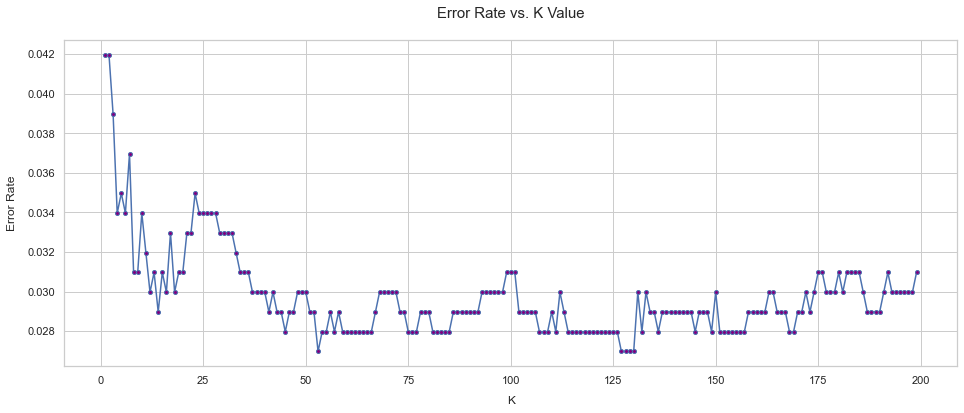

In [25]:
plt.figure(figsize=(16,6))
plt.plot(k_value, error_rate,'-o', markerfacecolor = 'purple', markersize = 4)
plt.title('Error Rate vs. K Value\n', fontsize = 15)
plt.xlabel('K', labelpad = 10)
plt.ylabel('Error Rate', labelpad = 10)
optim_k = error_rate.index(min(error_rate)) + 1 # plus one becuz index start from 0
print("Optimal K-value =", optim_k)

In [26]:
# using StandardScaler, optim_k = 53
knn = KNeighborsClassifier(n_neighbors = optim_k, weights='distance') 
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_accu = knn.score(X_test, y_test)
print("Model accuracy score        :", knn_accu)

Model accuracy score        : 0.973026973026973


In [27]:
# Normalize the data

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

k_value = [i for i in range(1, 200)]
error_rate = []

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Optimal K-value = 148


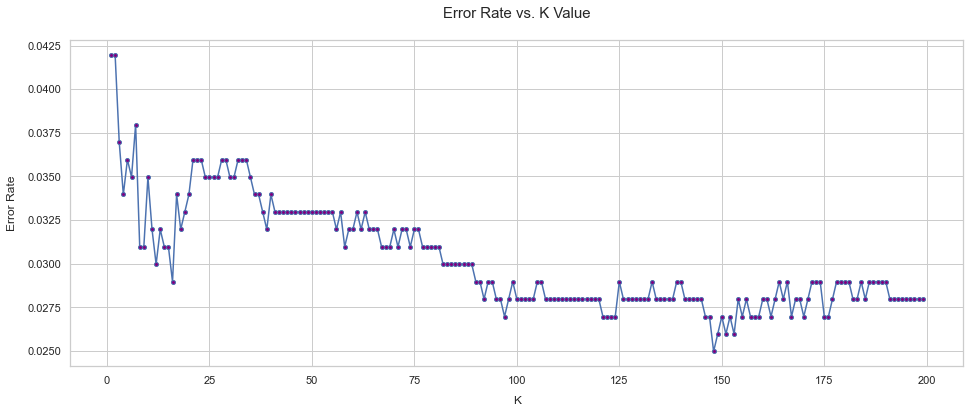

In [28]:
plt.figure(figsize=(16,6))
plt.plot(k_value, error_rate,'-o', markerfacecolor = 'purple', markersize = 4)
plt.title('Error Rate vs. K Value\n', fontsize = 15)
plt.xlabel('K', labelpad = 10)
plt.ylabel('Error Rate', labelpad = 10)
optim_k = error_rate.index(min(error_rate)) + 1 # plus one becuz index start from 0
print("Optimal K-value =", optim_k)

In [29]:
# using StandardScaler, optim_k = 148
knn = KNeighborsClassifier(n_neighbors = optim_k, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_accu = knn.score(X_test, y_test)
print("Model accuracy score        :", knn_accu)

Model accuracy score        : 0.975024975024975


### Normalization give the better accuracy. Choose MinMaxScalar() for all the model.

<hr style="border:0.3px solid gray"> </hr>

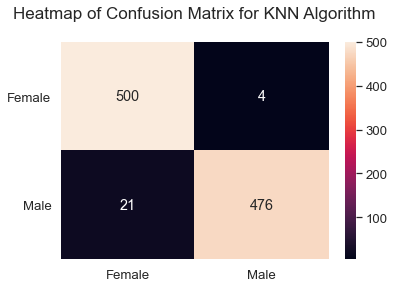

In [30]:
# heatmap of confusion matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn = pd.DataFrame(data = cm_knn, columns = ['Female', 'Male'], index = ['Female', 'Male'])

sns.set(font_scale=1.2)
plt.subplots(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix for KNN Algorithm\n', fontsize = 17)
hm_knn = sns.heatmap(cm_knn, annot=True, fmt = 'd')
hm_knn.set_yticklabels(hm_knn.get_yticklabels(), rotation = 0) 
plt.show()

In [31]:
target_names = ['Female', 'Male']
print(classification_report(y_test, y_pred_knn, digits = 4, target_names = target_names))

              precision    recall  f1-score   support

      Female     0.9597    0.9921    0.9756       504
        Male     0.9917    0.9577    0.9744       497

    accuracy                         0.9750      1001
   macro avg     0.9757    0.9749    0.9750      1001
weighted avg     0.9756    0.9750    0.9750      1001



In [32]:
# check for overfitting and underfitting
knn_accu = knn.score(X_test, y_test)
print("Model accuracy score        :", knn_accu)
print("Training-set accuracy score :", knn.score(X_train, y_train))

Model accuracy score        : 0.975024975024975
Training-set accuracy score : 0.999


In [33]:
# Precision, recall, and f1-score for the data
prec_scores = []
reca_scores = []
f1_scores = []
precision, recall, fscore, support = score(y_test, y_pred_knn, average='weighted')

print('Precision : {:0.4f}'.format(precision))
print('Recall    : {:0.4f}'.format(recall))
print('F1-score  : {:0.4f}'.format(fscore))
prec_scores.append(precision)
reca_scores.append(recall)
f1_scores.append(fscore)

Precision : 0.9756
Recall    : 0.9750
F1-score  : 0.9750


<hr style="border:0.3px solid gray"> </hr>

# SVM Algorithm

Fit the data into Support Vector Machines algorithm. This algorithm creates a line or a hyperplane which separates the data into classes.

Referance: https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

In [34]:
from sklearn.svm import SVC

In [35]:
svm_before = SVC()
svm_before.fit(X_train, y_train);

In [36]:
# check for overfitting and underfitting
svm_accu_before = svm_before.score(X_test, y_test)
print("Model accuracy score        :", svm_accu_before)
print("Training-set accuracy score :", svm_before.score(X_train, y_train))
before_tune.append(svm_accu_before)

Model accuracy score        : 0.971028971028971
Training-set accuracy score : 0.97425


## Hyperparameter Tuning for SVM model

In [37]:
param_grid_svm = [ { 'C': [0.1, 1, 10, 100, 500, 1000],
                     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                     'kernel': ['rbf', 'poly', 'linear', 'sigmoid'] } ]

optimal_params_svm = GridSearchCV(SVC(), param_grid_svm, cv = 5, scoring = 'accuracy', verbose = 0, n_jobs = -1)
optimal_params_svm.fit(X_train, y_train)
svm_opt_param = optimal_params_svm.best_params_
print("Best Parameter :", svm_opt_param)

Best Parameter : {'C': 10, 'gamma': 1, 'kernel': 'poly'}


In [38]:
svm = SVC(C = svm_opt_param.get('C'), kernel = svm_opt_param.get('kernel'), gamma = svm_opt_param.get('gamma'))
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

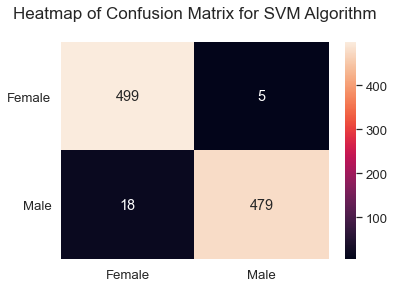

In [39]:
# heatmap of confusion matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(data = cm_svm, columns = ['Female', 'Male'], index = ['Female', 'Male'])

sns.set(font_scale=1.2)
plt.subplots(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix for SVM Algorithm\n', fontsize = 17)
hm_svm = sns.heatmap(cm_svm, annot=True, fmt = 'd')
hm_svm.set_yticklabels(hm_svm.get_yticklabels(), rotation = 0) 
plt.show()

In [40]:
print(classification_report(y_test, y_pred_svm, digits = 4, target_names = target_names))

              precision    recall  f1-score   support

      Female     0.9652    0.9901    0.9775       504
        Male     0.9897    0.9638    0.9766       497

    accuracy                         0.9770      1001
   macro avg     0.9774    0.9769    0.9770      1001
weighted avg     0.9773    0.9770    0.9770      1001



In [41]:
# check for overfitting and underfitting
svm_accu = svm.score(X_test, y_test)
print("Model accuracy score        :", svm_accu)
print("Training-set accuracy score :", svm.score(X_train, y_train))

Model accuracy score        : 0.977022977022977
Training-set accuracy score : 0.97775


In [42]:
# Precision, recall, and f1-score for the data

precision, recall, fscore, support = score(y_test, y_pred_svm, average='weighted')

print('Precision : {:0.4f}'.format(precision))
print('Recall    : {:0.4f}'.format(recall))
print('F1-score  : {:0.4f}'.format(fscore))
prec_scores.append(precision)
reca_scores.append(recall)
f1_scores.append(fscore)

Precision : 0.9773
Recall    : 0.9770
F1-score  : 0.9770


<hr style="border:0.3px solid gray"> </hr>

# NB Algorithm

Fit the data into Naive Bayes algorithm. Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [43]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score

In [44]:
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}

for key, model in nb.items():
    s = cross_val_score(model, X, y, cv = 5, n_jobs = 4, scoring = 'accuracy')
    scores[key] = np.mean(s)

print('Cross validation scores:')
print('Gaussian    = {:0.4f}'.format(scores.get('gaussian')))
print('Bernoulli   = {:0.4f}'.format(scores.get('bernoulli')))
print('Multinomial = {:0.4f}'.format(scores.get('multinomial')))

Cross validation scores:
Gaussian    = 0.9712
Bernoulli   = 0.9572
Multinomial = 0.9578


In [45]:
gnb_before = GaussianNB()
gnb_before.fit(X_train,y_train);

In [46]:
# check for overfitting and underfitting
gnb_accu_before = gnb_before.score(X_test, y_test)
print("Model accuracy score        :", gnb_accu_before)
print("Training-set accuracy score :", gnb_before.score(X_train, y_train))
before_tune.append(gnb_accu_before)

Model accuracy score        : 0.968031968031968
Training-set accuracy score : 0.97075


## Hyperparameter Tuning for NB model

Reference: 
1. https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-naive-bayes
2. https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [47]:
param_grid_nb = { 'var_smoothing': np.logspace(0, -9, num = 1000) }
optimal_params_nb = GridSearchCV(GaussianNB(), param_grid_nb, verbose = 0, cv = 10, n_jobs = -1)
optimal_params_nb.fit(X_train, y_train)
nb_opt_param = optimal_params_nb.best_params_
print('Best Parameters :', nb_opt_param)

Best Parameters : {'var_smoothing': 0.1156280131207376}


In [48]:
gnb = GaussianNB(var_smoothing = nb_opt_param.get('var_smoothing'))
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

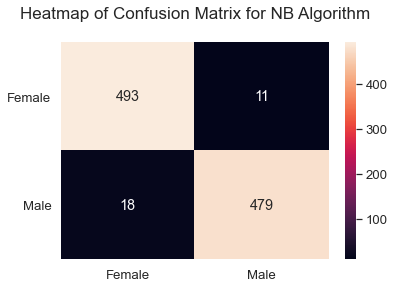

In [49]:
# heatmap of confusion matrix

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_gnb = pd.DataFrame(data = cm_gnb, columns = ['Female', 'Male'], index = ['Female', 'Male'])

sns.set(font_scale=1.2)
plt.subplots(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix for NB Algorithm\n', fontsize = 17)
hm_gnb = sns.heatmap(cm_gnb, annot = True, fmt = 'd')
hm_gnb.set_yticklabels(hm_gnb.get_yticklabels(), rotation = 0) 
plt.show()

In [50]:
print(classification_report(y_test, y_pred_gnb, digits = 4, target_names = target_names))

              precision    recall  f1-score   support

      Female     0.9648    0.9782    0.9714       504
        Male     0.9776    0.9638    0.9706       497

    accuracy                         0.9710      1001
   macro avg     0.9712    0.9710    0.9710      1001
weighted avg     0.9711    0.9710    0.9710      1001



In [51]:
# check for overfitting and underfitting

gnb_accu = gnb.score(X_test, y_test)
print("Model accuracy score        :", gnb_accu)
print("Training-set accuracy score :", gnb.score(X_train, y_train))

Model accuracy score        : 0.971028971028971
Training-set accuracy score : 0.9715


In [52]:
# Precision, recall, and f1-score for the data

precision, recall, fscore, support = score(y_test, y_pred_gnb, average='weighted')

print('Precision : {:0.4f}'.format(precision))
print('Recall    : {:0.4f}'.format(recall))
print('F1-score  : {:0.4f}'.format(fscore))
prec_scores.append(precision)
reca_scores.append(recall)
f1_scores.append(fscore)

Precision : 0.9711
Recall    : 0.9710
F1-score  : 0.9710


<hr style="border:0.3px solid gray"> </hr>

# Log Reg Algorithm

Fit the data into Logistic Regression algorithm. It is a predictive analysis algorithm and based on the concept of probability and using a more complex cost function.

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logReg_before = LogisticRegression()
logReg_before.fit(X_train,y_train);

In [55]:
# check for overfitting and underfitting
logReg_accu_before = logReg_before.score(X_test, y_test)
print("Model accuracy score        :", logReg_accu_before)
print("Training-set accuracy score :", logReg_before.score(X_train, y_train))
before_tune.append(logReg_accu_before)

Model accuracy score        : 0.9660339660339661
Training-set accuracy score : 0.9685


## Hyperparameter Tuning for Log Reg model

Reference:
1. https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
2. https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python#4.-Logistic-Regression-and-Results

In [56]:
param_grid_logReg = [ { 'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'C': np.arange(1e-05, 3, 0.1),
                        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                        'max_iter' : [100, 1000,2500, 5000] } ]

optimal_params_logReg = GridSearchCV(LogisticRegression(), param_grid_logReg, verbose = 0, cv = 5, n_jobs = -1, 
                                     refit = 'Accuracy', return_train_score = True)
optimal_params_logReg.fit(X_train,y_train)
logReg_opt_param = optimal_params_logReg.best_params_
print('Best Parameters :', logReg_opt_param)

Best Parameters : {'C': 0.30001000000000005, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [57]:
logReg = LogisticRegression(C = logReg_opt_param.get('C'), max_iter = logReg_opt_param.get('max_iter'), 
                            penalty = logReg_opt_param.get('penalty'), solver = logReg_opt_param.get('solver'))
logReg.fit(X_train, y_train)
y_pred_logReg = logReg.predict(X_test)

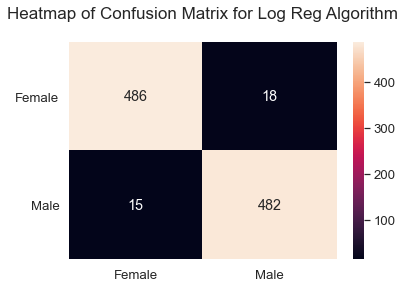

In [58]:
# heatmap of confusion matrix

cm_logReg = confusion_matrix(y_test, y_pred_logReg)
cm_logReg = pd.DataFrame(data = cm_logReg, columns = ['Female', 'Male'], index = ['Female', 'Male'])

sns.set(font_scale=1.2)
plt.subplots(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix for Log Reg Algorithm\n', fontsize = 17)
hm_logReg = sns.heatmap(cm_logReg, annot = True, fmt = 'd')
hm_logReg.set_yticklabels(hm_logReg.get_yticklabels(), rotation = 0) 
plt.show()

In [59]:
print(classification_report(y_test, y_pred_logReg, digits = 4, target_names = target_names))

              precision    recall  f1-score   support

      Female     0.9701    0.9643    0.9672       504
        Male     0.9640    0.9698    0.9669       497

    accuracy                         0.9670      1001
   macro avg     0.9670    0.9671    0.9670      1001
weighted avg     0.9671    0.9670    0.9670      1001



In [60]:
# check for overfitting and underfitting

logReg_accu = logReg.score(X_test, y_test)
print("Model accuracy score        :", logReg_accu)
print("Training-set accuracy score :", logReg.score(X_train, y_train))

Model accuracy score        : 0.967032967032967
Training-set accuracy score : 0.9685


In [61]:
# Precision, recall, and f1-score for the data

precision, recall, fscore, support = score(y_test, y_pred_logReg, average='weighted')

print('Precision : {:0.4f}'.format(precision))
print('Recall    : {:0.4f}'.format(recall))
print('F1-score  : {:0.4f}'.format(fscore))
prec_scores.append(precision)
reca_scores.append(recall)
f1_scores.append(fscore)

Precision : 0.9671
Recall    : 0.9670
F1-score  : 0.9670


<hr style="border:0.3px solid gray"> </hr>

# DT Algorithm

Fit the data into Decision Tree algorithm. It uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_before = DecisionTreeClassifier(random_state = 42)
dt_before.fit(X_train, y_train);

In [64]:
# check for overfitting and underfitting
dt_accu_before = dt_before.score(X_test, y_test)
print("Model accuracy score        :", dt_accu_before)
print("Training-set accuracy score :", dt_before.score(X_train, y_train))
before_tune.append(dt_accu_before)

Model accuracy score        : 0.968031968031968
Training-set accuracy score : 0.999


## Hyperparameter Tuning for DT model

In [65]:
param_grid_dt = [ { 'max_depth': range(1, 8, 2),
                    'max_features': range(1, 7), 
                    'max_leaf_nodes': list(range(2, 50)),
                    'min_samples_split': [2, 3, 4] } ]

optimal_params_dt = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid_dt, n_jobs = -1, verbose = 0, cv = 4, 
                                 scoring = "accuracy")
optimal_params_dt.fit(X_train, y_train)
dt_opt_param = optimal_params_dt.best_params_
print('Best Parameters :', dt_opt_param)

Best Parameters : {'max_depth': 7, 'max_features': 6, 'max_leaf_nodes': 29, 'min_samples_split': 2}


In [66]:
dt = DecisionTreeClassifier(max_depth = dt_opt_param.get('max_depth'), max_features = dt_opt_param.get('max_features'), 
                            max_leaf_nodes = dt_opt_param.get('max_leaf_nodes'), 
                            min_samples_split = dt_opt_param.get('min_samples_split'), random_state = 42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

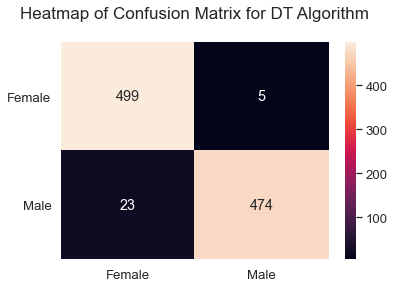

In [67]:
# heatmap of confusion matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt = pd.DataFrame(data = cm_dt, columns = ['Female', 'Male'], index = ['Female', 'Male'])

sns.set(font_scale=1.2)
plt.subplots(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix for DT Algorithm\n', fontsize = 17)
hm_dt = sns.heatmap(cm_dt, annot = True, fmt = 'd')
hm_dt.set_yticklabels(hm_dt.get_yticklabels(), rotation = 0) 
plt.show()

In [68]:
print(classification_report(y_test, y_pred_dt, digits = 4, target_names = target_names))

              precision    recall  f1-score   support

      Female     0.9559    0.9901    0.9727       504
        Male     0.9896    0.9537    0.9713       497

    accuracy                         0.9720      1001
   macro avg     0.9728    0.9719    0.9720      1001
weighted avg     0.9726    0.9720    0.9720      1001



In [69]:
# check for overfitting and underfitting

dt_accu = dt.score(X_test, y_test)
print("Model accuracy score        :", dt_accu)
print("Training-set accuracy score :", dt.score(X_train, y_train))

Model accuracy score        : 0.972027972027972
Training-set accuracy score : 0.977


In [70]:
# Precision, recall, and f1-score for the data

precision, recall, fscore, support = score(y_test, y_pred_dt, average='weighted')

print('Precision : {:0.4f}'.format(precision))
print('Recall    : {:0.4f}'.format(recall))
print('F1-score  : {:0.4f}'.format(fscore))
prec_scores.append(precision)
reca_scores.append(recall)
f1_scores.append(fscore)

Precision : 0.9726
Recall    : 0.9720
F1-score  : 0.9720


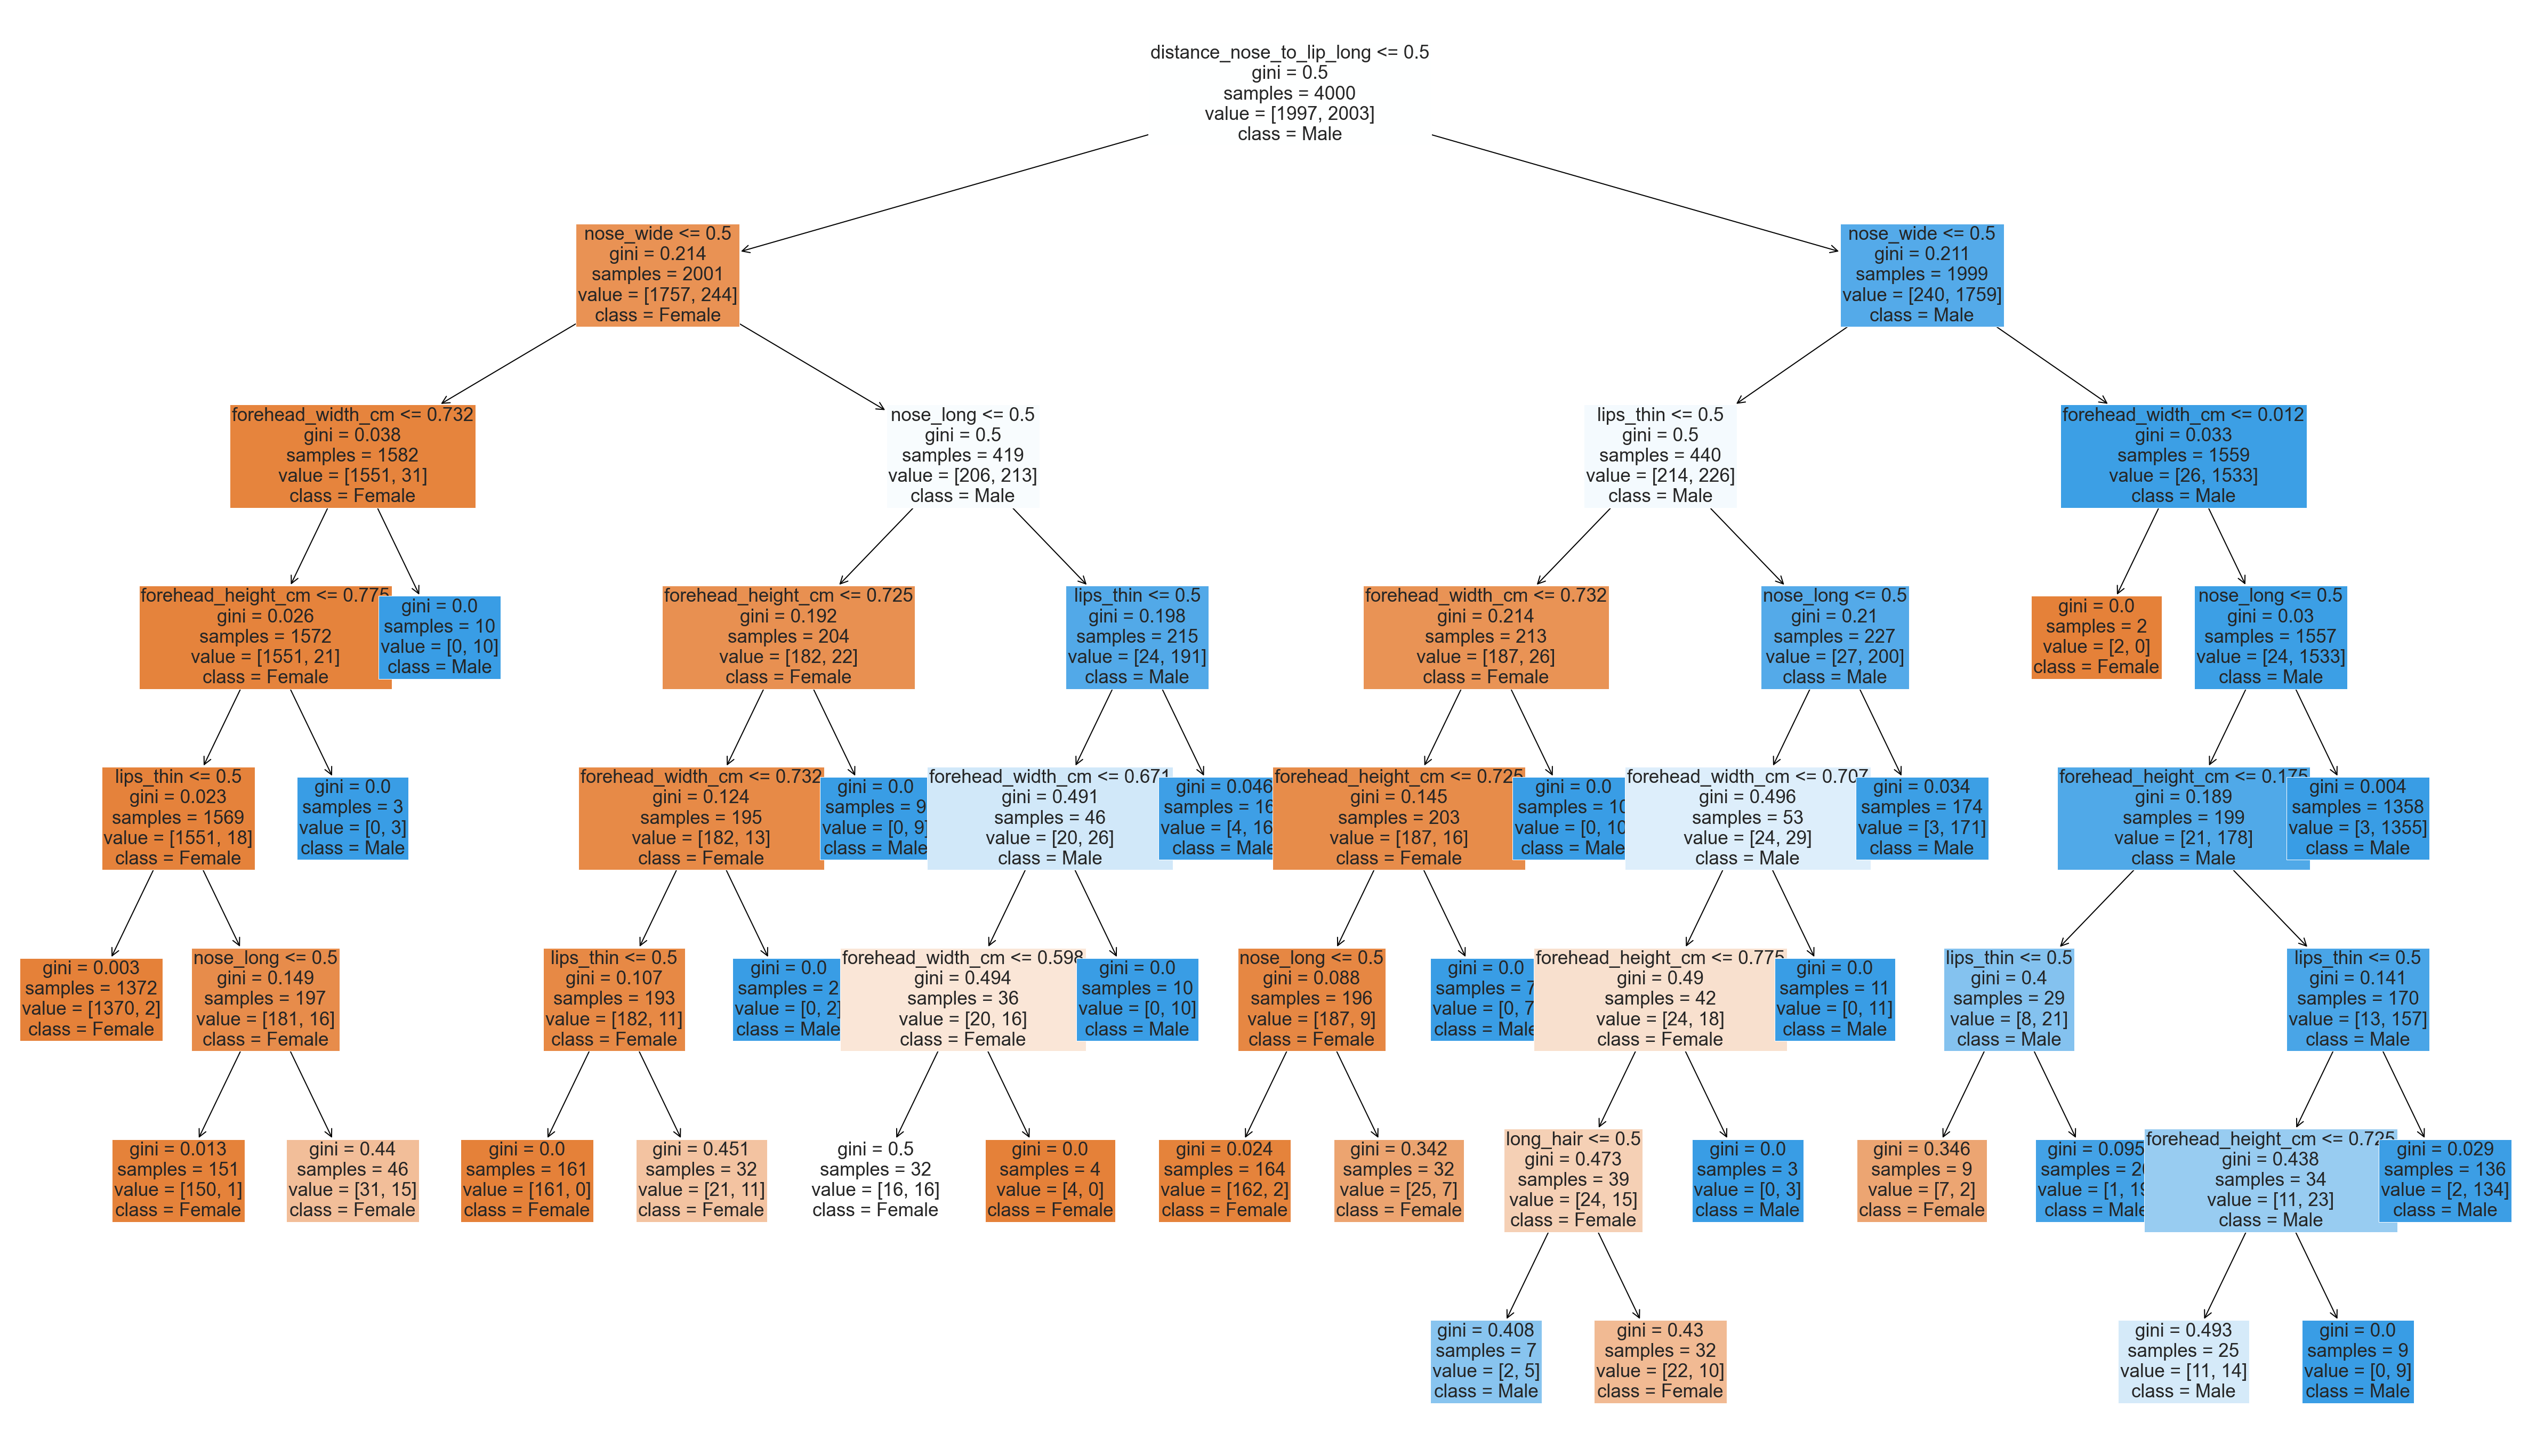

In [71]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(85,50))
out = plot_tree(dt, feature_names = X.columns, class_names = ['Female','Male'], filled = True, fontsize = 35)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

In [72]:
from sklearn.tree import export_graphviz

export_graphviz( dt,
                 out_file = "gender_tree.dot",
                 feature_names = X.columns,
                 class_names = ['Female','Male'],
                 rounded = True,
                 filled = True )

In [73]:
from subprocess import check_call

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# convert to PDF or PNG using command-line tool.
check_call(['dot','-Tpng','gender_tree.dot','-o','gender_tree.png']);

<hr style="border:0.3px solid gray"> </hr>

# RF Algorithm

Fit the data into Random Forest algorithm. It builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [74]:
rf_before = RandomForestClassifier()
rf_before.fit(X_train, y_train);

In [75]:
# check for overfitting and underfitting
rf_accu_before = rf_before.score(X_test, y_test)
print("Model accuracy score        :", rf_accu_before)
print("Training-set accuracy score :", rf_before.score(X_train, y_train))
before_tune.append(rf_accu_before)

Model accuracy score        : 0.974025974025974
Training-set accuracy score : 0.999


## Hyperparameter Tuning for RF model

In [76]:
param_grid_rf = [ { 'n_estimators': [100, 200, 300],
                    'max_features': range(1, 7),
                    'max_depth' : [4, 5, 6, 7, 8],
                    'criterion' : ['gini', 'entropy'], 
                    'min_samples_split': [2, 3, 4] } ]

optimal_params_rf = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid_rf, n_jobs = -1, verbose = 1, 
                                 cv = 5, scoring = "accuracy")
optimal_params_rf.fit(X_train, y_train)
rf_opt_param = optimal_params_rf.best_params_
print('Best Parameters :', rf_opt_param)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  7.0min finished


Best Parameters : {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 300}


In [77]:
rf = RandomForestClassifier(criterion = rf_opt_param.get('criterion'), max_depth = rf_opt_param.get('max_depth'), 
                            max_features = rf_opt_param.get('max_features'), 
                            min_samples_split = rf_opt_param.get('min_samples_split'), 
                            n_estimators = rf_opt_param.get('n_estimators'), random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

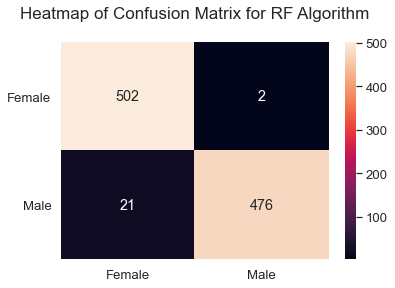

In [78]:
# heatmap of confusion matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(data = cm_rf, columns = ['Female', 'Male'], index = ['Female', 'Male'])

sns.set(font_scale=1.2)
plt.subplots(figsize=(6, 4))
plt.title('Heatmap of Confusion Matrix for RF Algorithm\n', fontsize = 17)
hm_rf = sns.heatmap(cm_rf, annot = True, fmt = 'd')
hm_rf.set_yticklabels(hm_rf.get_yticklabels(), rotation = 0) 
plt.show()

In [79]:
print(classification_report(y_test, y_pred_rf, digits = 4, target_names = target_names))

              precision    recall  f1-score   support

      Female     0.9598    0.9960    0.9776       504
        Male     0.9958    0.9577    0.9764       497

    accuracy                         0.9770      1001
   macro avg     0.9778    0.9769    0.9770      1001
weighted avg     0.9777    0.9770    0.9770      1001



In [80]:
# check for overfitting and underfitting

rf_accu = rf.score(X_test, y_test)
print("Model accuracy score        :", rf_accu)
print("Training-set accuracy score :", rf.score(X_train, y_train))

Model accuracy score        : 0.977022977022977
Training-set accuracy score : 0.97825


In [81]:
# Precision, recall, and f1-score for the data

precision, recall, fscore, support = score(y_test, y_pred_rf, average='weighted')

print('Precision : {:0.4f}'.format(precision))
print('Recall    : {:0.4f}'.format(recall))
print('F1-score  : {:0.4f}'.format(fscore))
prec_scores.append(precision)
reca_scores.append(recall)
f1_scores.append(fscore)

Precision : 0.9777
Recall    : 0.9770
F1-score  : 0.9770


In [82]:
# show one of the tree in the random forest algorithm
rf_tree = rf.estimators_[3]

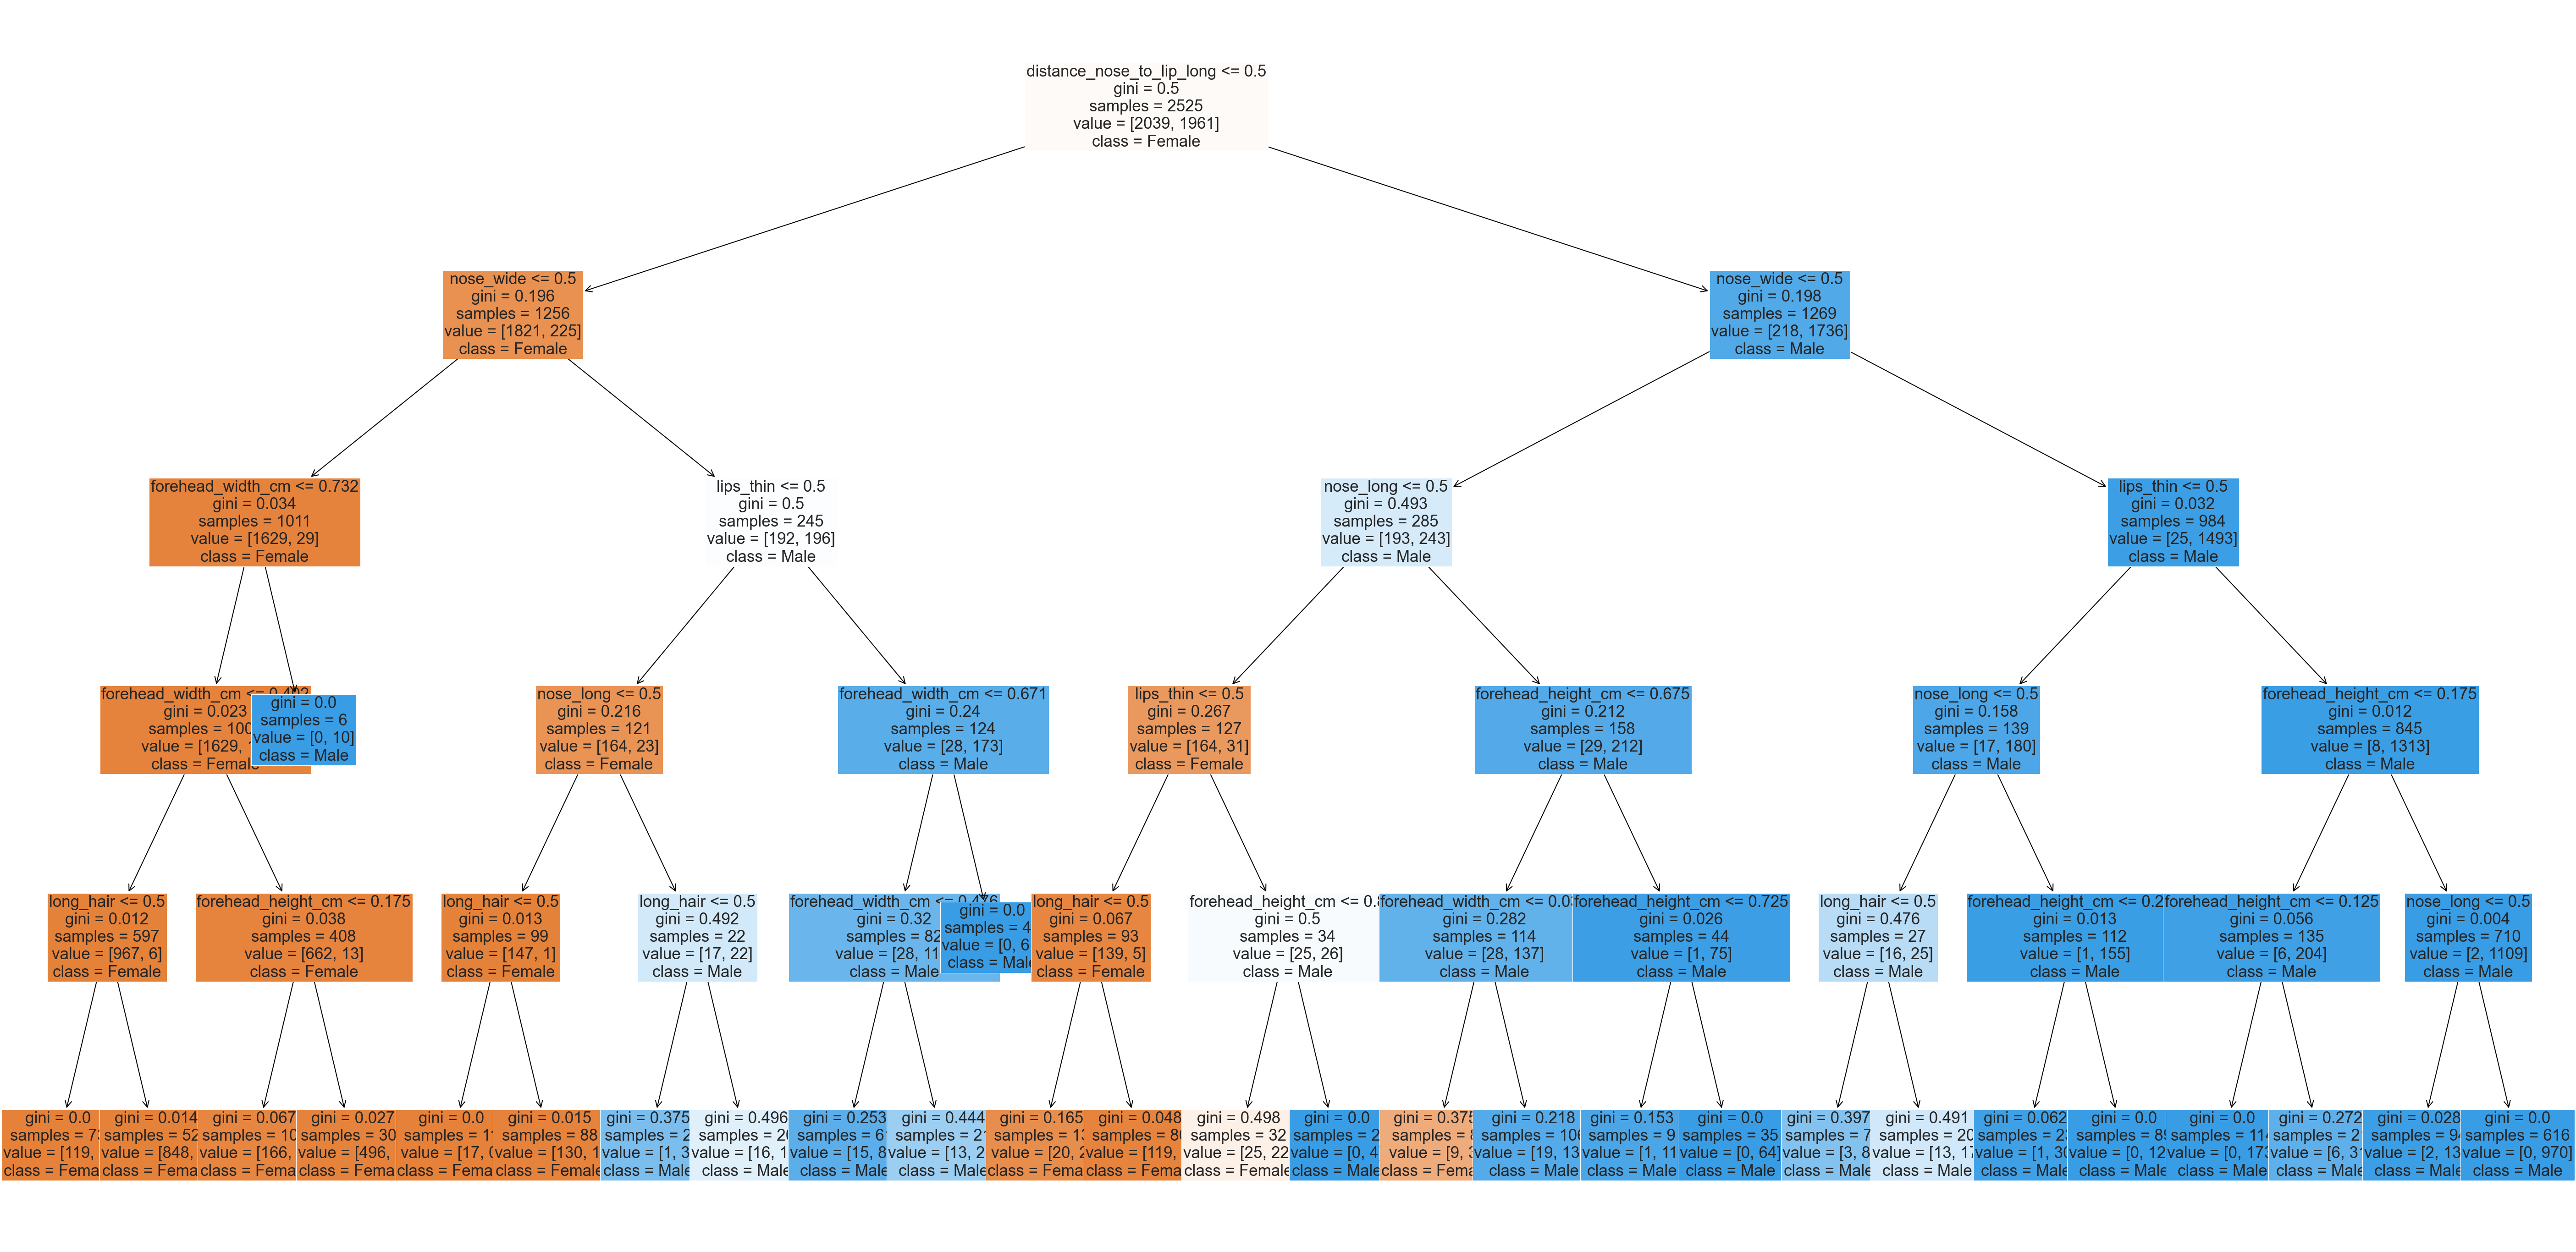

In [83]:
fig, ax = plt.subplots(figsize=(100,50))
out = plot_tree(rf_tree, feature_names = X.columns, class_names = ['Female','Male'], filled = True, fontsize = 35)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

In [84]:
export_graphviz( rf_tree,
                 out_file = "gender_tree_in_forest.do",
                 feature_names = X.columns,
                 class_names = ['Female','Male'],
                 rounded = True,
                 filled = True )

In [85]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# convert to PDF or PNG using command-line tool.
check_call(['dot','-Tpng','gender_tree_in_forest.dot','-o','gender_tree_in_forest.png']);

<hr style="border:0.3px solid gray"> </hr>

# Compare the Performance Before and After Tuning

In [86]:
accu_scores = []
accu_scores.append(knn_accu)
accu_scores.append(svm_accu)
accu_scores.append(gnb_accu)
accu_scores.append(logReg_accu)
accu_scores.append(dt_accu)
accu_scores.append(rf_accu)

In [87]:
model_name = ['KNN', 'SVM', 'NB', 'LR', 'DT', 'RF']
comp_tune = pd.DataFrame()
comp_tune['Model'] = model_name
comp_tune['Before_Tuning'] = before_tune
comp_tune['After_Tuning'] = accu_scores

# round to 4 decimal place
comp_tune['Before_Tuning'] = comp_tune['Before_Tuning'].round(4)
comp_tune['After_Tuning'] = comp_tune['After_Tuning'].round(4)

In [88]:
comp_tune

,Model,Before_Tuning,After_Tuning
0,KNN,0.964,0.975
1,SVM,0.971,0.977
2,NB,0.968,0.971
3,LR,0.966,0.967
4,DT,0.968,0.972
5,RF,0.974,0.977


# Compare All the Model

Append the score (accuracy, precision, recall) of all the model used in a list, then visualize it using bar chart.

## Accuracy Score

In [89]:
df_1 = pd.DataFrame()
df_1['Model'] = model_name
df_1['Accuracy Score'] = accu_scores

# round the accuracy score to 4 decimal place
df_1['Accuracy Score'] = df_1['Accuracy Score'].round(4)

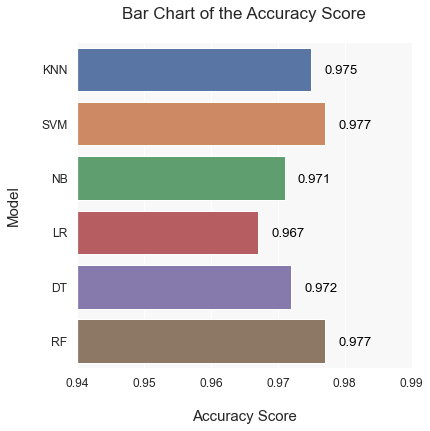

In [90]:
sns.set(font_scale = 1.1)
plt.subplots(figsize = (6, 6))
plt.title('Bar Chart of the Accuracy Score\n', fontsize = 17)
ax = sns.barplot(x = "Accuracy Score", y = "Model", data = df_1)
ax.set_facecolor("#F8F8F8")

for i, v in enumerate(df_1['Accuracy Score']):
    ax.text(v + 0.002, i + 0.08, str(v), color = 'black')

plt.xlabel("Accuracy Score", fontsize = 15, labelpad = 20)
plt.ylabel("Model", fontsize = 15, labelpad = 20)
plt.xlim([0.94, 0.99])
plt.show()

## Precision Score

In [91]:
df_2 = pd.DataFrame()
df_2['Model'] = model_name
df_2['Precision Score'] = prec_scores

# round the precision score to 4 decimal place
df_2['Precision Score'] = df_2['Precision Score'].round(4)

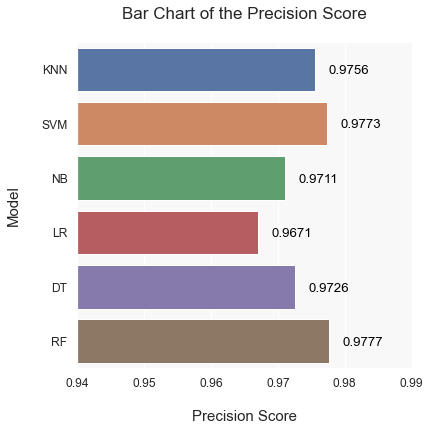

In [92]:
sns.set(font_scale = 1.1)
plt.subplots(figsize = (6, 6))
plt.title('Bar Chart of the Precision Score\n', fontsize = 17)
ax = sns.barplot(x = "Precision Score", y = "Model", data = df_2)
ax.set_facecolor("#F8F8F8")

for i, v in enumerate(df_2['Precision Score']):
    ax.text(v + 0.002, i + 0.08, str(v), color = 'black')

plt.xlabel("Precision Score", fontsize = 15, labelpad = 20)
plt.ylabel("Model", fontsize = 15, labelpad = 20)
plt.xlim([0.94, 0.99])
plt.show()

## Recall Score

In [93]:
df_3 = pd.DataFrame()
df_3['Model'] = model_name
df_3['Recall Score'] = reca_scores

# round the recall score to 4 decimal place
df_3['Recall Score'] = df_3['Recall Score'].round(4)

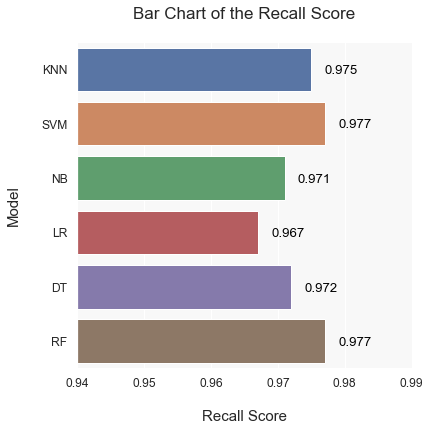

In [94]:
sns.set(font_scale = 1.1)
plt.subplots(figsize = (6, 6))
plt.title('Bar Chart of the Recall Score\n', fontsize = 17)
ax = sns.barplot(x = "Recall Score", y = "Model", data = df_3)
ax.set_facecolor("#F8F8F8")

for i, v in enumerate(df_3['Recall Score']):
    ax.text(v + 0.002, i + 0.08, str(v), color = 'black')

plt.xlabel("Recall Score", fontsize = 15, labelpad = 20)
plt.ylabel("Model", fontsize = 15, labelpad = 20)
plt.xlim([0.94, 0.99])
plt.show()

## F1-Score

In [95]:
df_4 = pd.DataFrame()
df_4['Model'] = model_name
df_4['F1-Score'] = f1_scores

# round the recall score to 4 decimal place
df_4['F1-Score'] = df_4['F1-Score'].round(4)

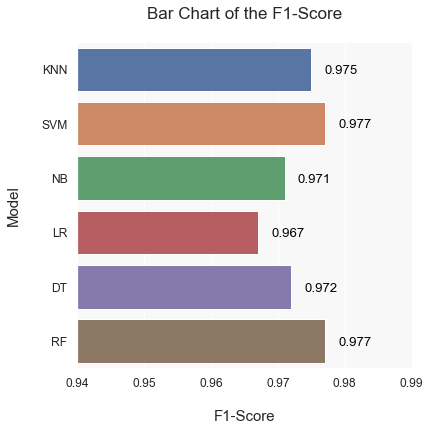

In [96]:
sns.set(font_scale = 1.1)
plt.subplots(figsize = (6, 6))
plt.title('Bar Chart of the F1-Score\n', fontsize = 17)
ax = sns.barplot(x = "F1-Score", y = "Model", data = df_4)
ax.set_facecolor("#F8F8F8")

for i, v in enumerate(df_4['F1-Score']):
    ax.text(v + 0.002, i + 0.08, str(v), color = 'black')

plt.xlabel("F1-Score", fontsize = 15, labelpad = 20)
plt.ylabel("Model", fontsize = 15, labelpad = 20)
plt.xlim([0.94, 0.99])
plt.show()

### Random Forest Algorithm has the best performance among all the model. It is the best model to predict this dataset.

<hr style="border:0.3px solid gray"> </hr>

# Save the Model using Pickle

After saving it into pickle, it can be stored, or commit to Git, this model and run it on unseen test data without the need to re-train the model again from scratch.

In [97]:
import pickle

# 'with' statement ensures that the file is closed when the block inside with is exited
with open("model_pickle", "wb") as f: # wb = write binary
    pickle.dump(rf, f)

In [98]:
# start from here to load model and use to predict user input
import pickle

with open("model_pickle", "rb") as f: # rb = read binary
    best_model = pickle.load(f)

## Get User Prompt and Predict the Result

It may available the user to insert the desirable features, and predict the gender based on the features.

In [99]:
def check_input(prompt_text, orint):
    while True:
        if orint:
            try:
                num = int(input(prompt_text))
                if num == 0 or num == 1:
                    break
                else:
                    print('Only binary input is accepted, please enter again.\n')
                break
            except:
                print('Only integer input is accepted, please enter again.\n')
        else:
            try:
                num = float(input(prompt_text))
                if num > 0:
                    break
                else:
                    print('Only positive input is accepted, please enter again.\n')
            except:
                print('Only number input is accepted, please enter again.\n')
    return num

In [ ]:
print("Please enter the value for the facial part below:\n")

forehead_width = check_input('What is the width of the forehead(in cm)?  ', 0)
forehead_height = check_input('What is the height of the forehead(in cm)? ', 0)

print("\n\nPlease enter only 0 (= No) or 1 (= Yes) for the facial part below:\n")

hair = check_input('Does the individual has a long hair?     ', 1)
wide_nose = check_input('Does the individual has a wide nose?     ', 1)
long_nose = check_input('Does the individual has a long nose?     ', 1)
lip_thin = check_input('Does the individual has a thin lip?      ', 1)
long_philtrum = check_input('Does the individual has a long philtrum? ', 1)

input_data = [hair, forehead_width, forehead_height, wide_nose, long_nose, lip_thin, long_philtrum]
prediction = best_model.predict([input_data])
if prediction == ['Male']:
    pred = 'Male'
else:
    pred = 'Female'

print("\n------------------------------------------------------------------------")
print("\nThe predicted gender =", pred)